In [2]:
# Imports
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
import pyarrow as pa
import polars as pl
print('Imports OK')
# Optional: xgboost & lightgbm (may require libomp on macOS)
XGB_OK, LGBM_OK = False, False
try:
    import xgboost
    XGB_OK = True
except Exception as e:
    print('xgboost not available:', e)
try:
    import lightgbm
    LGBM_OK = True
except Exception as e:
    print('lightgbm not available:', e)

Imports OK
xgboost not available: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/seanqiu/Documents/test-project/.venv/lib/python3.9/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <89AD948E-E564-3266-867D-7AF89D6488F0> /Users/seanqiu/Documents/test-project/.venv/lib/python3.9/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptex

In [3]:
# Show versions
versions = {
    'python': sys.version.split()[0],
    'numpy': np.__version__,
    'pandas': pd.__version__,
    'scikit-learn': sklearn.__version__,
    'seaborn': sns.__version__,
    'matplotlib': plt.matplotlib.__version__,
    'statsmodels': sm.__version__,
    'pyarrow': pa.__version__,
    'polars': pl.__version__,
}
if XGB_OK:
    import xgboost
    versions['xgboost'] = xgboost.__version__
if LGBM_OK:
    import lightgbm
    versions['lightgbm'] = lightgbm.__version__
versions

{'python': '3.9.6',
 'numpy': '2.0.2',
 'pandas': '2.3.3',
 'scikit-learn': '1.6.1',
 'seaborn': '0.13.2',
 'matplotlib': '3.9.4',
 'statsmodels': '0.14.6',
 'pyarrow': '21.0.0',
 'polars': '1.36.1'}

## Quick DataFrame and Plot

In [4]:
# Create a simple DataFrame
df = pd.DataFrame({
    'x': np.arange(0, 50),
    'y': np.linspace(0, 1, 50) + np.random.normal(0, 0.05, 50)
})
df.head()

,x,y
0,0,-0.008918
1,1,0.064599
2,2,-0.014991
3,3,0.036663
4,4,0.076551


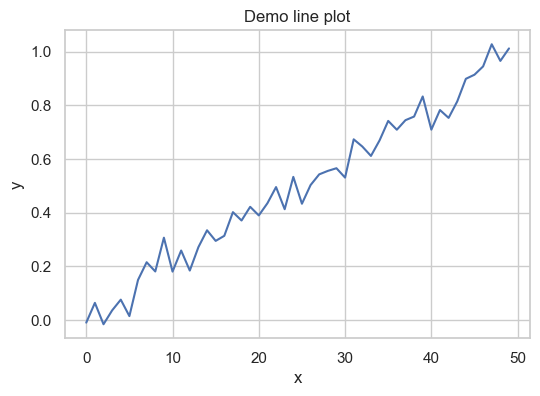

In [5]:
# Plot with seaborn
sns.set_theme(style='whitegrid')
plt.figure(figsize=(6, 4))
sns.lineplot(data=df, x='x', y='y')
plt.title('Demo line plot')
plt.show()

## Quick scikit-learn demo

In [6]:
# Fit a simple linear model
from sklearn.linear_model import LinearRegression
X = df[['x']].values
y = df['y'].values
model = LinearRegression().fit(X, y)
print('R^2:', model.score(X, y))
print('coef:', model.coef_[0], 'intercept:', model.intercept_)

R^2: 0.9745489271917904
coef: 0.019757158615924485 intercept: 0.00926456136602033


## Next steps
- Use `uv` to launch Jupyter Lab.
- If `xgboost`/`lightgbm` fail on macOS, install `libomp` (see README).